In [11]:
import os
from pathlib import Path
import mediapy
import torch
import numpy as np
import matplotlib.pyplot as plt

working_dir = Path.cwd()
while working_dir.name != 'gpudrive':
    working_dir = working_dir.parent
    if working_dir == Path.home():
        raise FileNotFoundError("Base directory 'gpudrive' not found")
os.chdir(working_dir)

from gpudrive.env.dataset import SceneDataLoader
from gpudrive.env.config import EnvConfig
from gpudrive.env.env_torch import GPUDriveTorchEnv
from gpudrive.visualize.utils import img_from_fig

import logging
logging.basicConfig(level=logging.INFO)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Dataset

In [12]:
train_loader = SceneDataLoader(
    root="data/processed/examples",
    batch_size=4, # Number of worlds
    dataset_size=1000,
    sample_with_replacement=False,
    shuffle=False,
)

### Model

- Training run: [here](https://wandb.ai/emerge_/paper_1_self_play/runs/PPO__S_3__01_09_20_23_08_617?nw=nwuserdaphnecor)
- ...


In [13]:
from examples.experimental.eval.eval_utils import load_policy, rollout

policy = load_policy(
    path_to_cpt='examples/experimental/eval/models',
    model_name='model_PPO____S_100__02_24_13_50_15_821_001262',
    device='cpu'
)

INFO:root:Load model from examples/experimental/eval/models/model_PPO____S_100__02_24_13_50_15_821_001262.pt
INFO:root:Load model parameters


In [14]:
# Check that the model weights are not random
# for name, param in policy.state_dict().items():
#     print(f"{name} - Mean: {param.mean():.4f}, Std: {param.std():.4f}")

In [15]:
policy

NeuralNet(
  (act_func): Tanh()
  (ego_embed): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (2): Tanh()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (partner_embed): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (2): Tanh()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (road_map_embed): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (2): Tanh()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (shared_embed): Sequential(
    (0): Linear(in_features=192, out_features=128, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
  (actor): Linear(in_f

### GPUDriveTorchEnv

In [16]:
env = GPUDriveTorchEnv(
    config=EnvConfig(),
    data_loader=train_loader,
    max_cont_agents=64, 
    device="cpu",
)

print(env.data_batch)

obs = env.reset()[env.cont_agent_mask]

print(f'observation_space: {env.observation_space}')
print(f'obs shape: {obs.shape}')
print(f'obs dtype: {obs.dtype} \n')

print(f'action_space: {env.action_space}')

plt.hist(obs.flatten());

['data/processed/examples/tfrecord-00000-of-01000_222.json', 'data/processed/examples/tfrecord-00000-of-01000_325.json', 'data/processed/examples/tfrecord-00000-of-01000_402.json', 'data/processed/examples/tfrecord-00002-of-01000_407.json']
observation_space: Box(-1.0, 1.0, (2984,), float32)
obs shape: torch.Size([56, 2984])
obs dtype: torch.float32 

action_space: Discrete(91)


In [17]:
# Show simulator to make sure we're at the same state
env.vis.figsize = (5, 5)
sim_states = env.vis.plot_simulator_state(
    env_indices=[0],
    zoom_radius=100,
    time_steps=[0],
)

sim_states[0]

<Figure size 500x500 with 1 Axes>

In [20]:

( 
 goal_achieved_count,
 frac_goal_achieved,
 collided_count,
 frac_collided,
 off_road_count,
 frac_off_road,
 not_goal_nor_crash_count,
 frac_not_goal_nor_crash_per_scene,
 controlled_agents_per_scene,
 sim_state_frames,
 agent_positions,
 episode_lengths
) = rollout(
    env=env, 
    policy=policy, 
    device='cpu', 
    render_sim_state=True,
    zoom_radius=100,
    deterministic=True,
)

print(f'\n Results: \n')
print(f'Goal achieved: {frac_goal_achieved}')
print(f'Collided: {frac_collided}')
print(f'Off road: {frac_off_road}')
print(f'Not goal nor crashed: {frac_not_goal_nor_crash_per_scene}')

INFO:root:Time step: 0


INFO:root:Time step: 1
INFO:root:Time step: 2
INFO:root:Time step: 3
INFO:root:Time step: 4
INFO:root:Time step: 5
INFO:root:Time step: 6
INFO:root:Time step: 7
INFO:root:Time step: 8
INFO:root:Time step: 9
INFO:root:Time step: 10
INFO:root:Time step: 11
INFO:root:Time step: 12
INFO:root:Time step: 13
INFO:root:Time step: 14
INFO:root:Time step: 15
INFO:root:Time step: 16
INFO:root:Time step: 17
INFO:root:Time step: 18
INFO:root:Time step: 19
INFO:root:Time step: 20
INFO:root:Time step: 21
INFO:root:Time step: 22
INFO:root:Time step: 23
INFO:root:Time step: 24
INFO:root:Time step: 25
INFO:root:Time step: 26
INFO:root:Time step: 27
INFO:root:Time step: 28
INFO:root:Time step: 29
INFO:root:Time step: 30
INFO:root:Time step: 31
INFO:root:Time step: 32
INFO:root:Time step: 33
INFO:root:Time step: 34
INFO:root:Time step: 35
INFO:root:Time step: 36
INFO:root:Time step: 37
INFO:root:Time step: 38
INFO:root:Time step: 39
INFO:root:Time step: 40
INFO:root:Time step: 41
INFO:root:Time step: 42
I


 Results: 

Goal achieved: tensor([1.0000, 1.0000, 1.0000, 0.3333])
Collided: tensor([0., 0., 0., 0.])
Off road: tensor([0.0000, 0.0000, 0.0000, 0.3333])
Not goal nor crashed: tensor([0.0000, 0.0000, 0.0000, 0.3333])


0,1,2,3

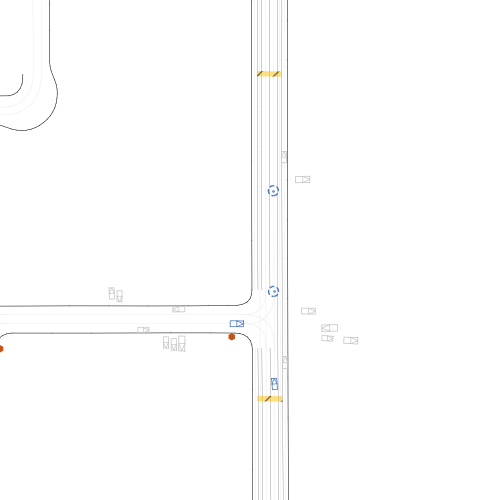
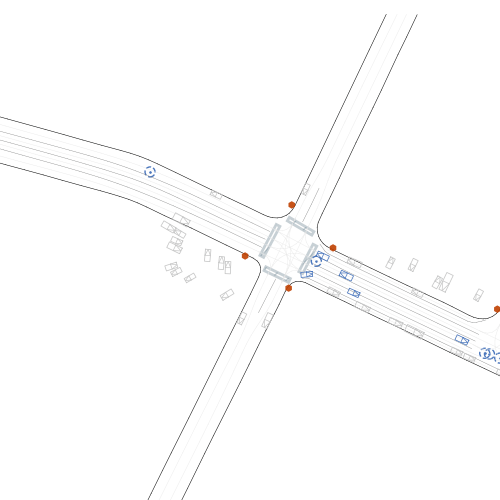
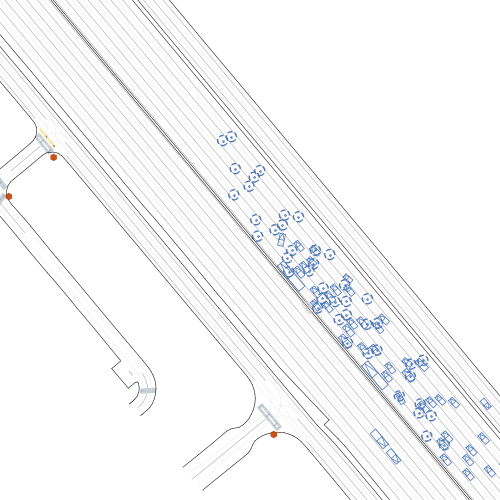
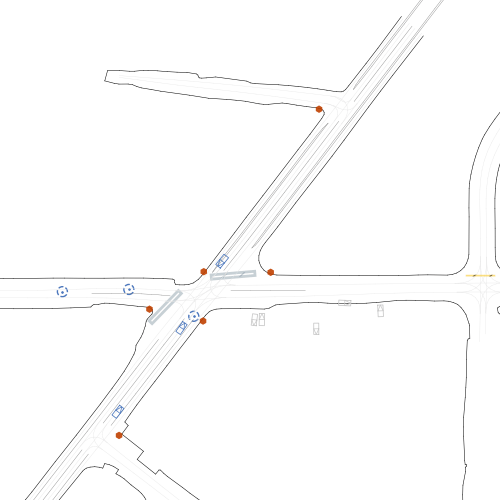

In [21]:
# Show rollout videos
mediapy.show_videos(sim_state_frames, fps=15, codec='gif')